In [1]:
using Plots
using LaTeXStrings
using Roots

In [2]:
function PlotStable(plt, x₀)
    scatter!(plt, x₀, zeros(Int, length(x₀)), marker=:circle, mc=:black, ms=6, label="Stable fixed points")
end

function PlotUnstable(plt, x₀)
    scatter!(plt, x₀, zeros(Int, length(x₀)), marker=:circle, mc=:white, ms=6, label="Unstable fixed points")
end

function PlotHalfStable(plt, x₀)
    scatter!(plt, x₀, zeros(Int, length(x₀)), marker=:diamond, mc=:gray, ms=6, label="Half-stable fixed points")
end

function PlotFlow(plt, x, markers)
    plot!(plt, x, zeros(Int, length(x)), marker=replace(markers, "l" => :ltriangle, "r" => :rtriangle), mc=:black, ms=7, label="")
end

PlotFlow (generic function with 1 method)

┌ Warning: Indices Base.OneTo(2) of attribute `markershape` does not match data indices 1:4.
└ @ Plots /home/vortriz/.julia/packages/Plots/Ec1L1/src/utils.jl:141
┌ Warning: Indices Base.OneTo(2) of attribute `markershape` does not match data indices 1:4.
└ @ Plots /home/vortriz/.julia/packages/Plots/Ec1L1/src/utils.jl:141
┌ Warning: Indices Base.OneTo(2) of attribute `markershape` does not match data indices 1:4.
└ @ Plots /home/vortriz/.julia/packages/Plots/Ec1L1/src/utils.jl:141
┌ Warning: Indices Base.OneTo(2) of attribute `markershape` does not match data indices 1:4.
└ @ Plots /home/vortriz/.julia/packages/Plots/Ec1L1/src/utils.jl:141
┌ Warning: Indices Base.OneTo(2) of attribute `markershape` does not match data indices 1:4.
└ @ Plots /home/vortriz/.julia/packages/Plots/Ec1L1/src/utils.jl:141
┌ Warning: Indices Base.OneTo(2) of attribute `markershape` does not match data indices 1:4.
└ @ Plots /home/vortriz/.julia/packages/Plots/Ec1L1/src/utils.jl:141


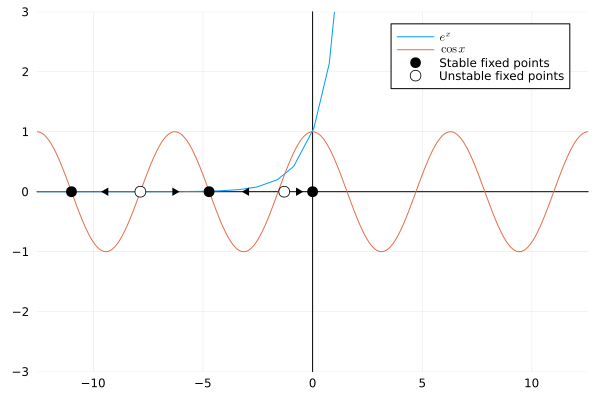

In [4]:
plt1 = plot(xlims=(-4π, 4π), ylims=(-3, 3), framestyle=:zerolines)

plot!(exp, label=L"$e^{x}$")
plot!(cos, label=L"$\cos x$")

f1(x) = exp(x) - cos(x)

fp1 = find_zeros(f1, -4π, 4π)
PlotStable(plt1, [fp1[1], fp1[3], fp1[5]])
PlotUnstable(plt1, [fp1[2], fp1[4]])
scatter!([(fp1[i]+fp1[i+1])/2 for i in 1:4], [0, 0, 0, 0], marker=[:ltriangle, :rtriangle], mc=:black, ms=6, label="")

plt1

In [71]:
savefig(plt1, "1")

┌ Warning: Indices Base.OneTo(2) of attribute `markershape` does not match data indices 1:4.
└ @ Plots /home/vortriz/.julia/packages/Plots/Ec1L1/src/utils.jl:141
┌ Warning: Indices Base.OneTo(2) of attribute `markershape` does not match data indices 1:4.
└ @ Plots /home/vortriz/.julia/packages/Plots/Ec1L1/src/utils.jl:141


"/home/vortriz/dev/IDC402/1.png"

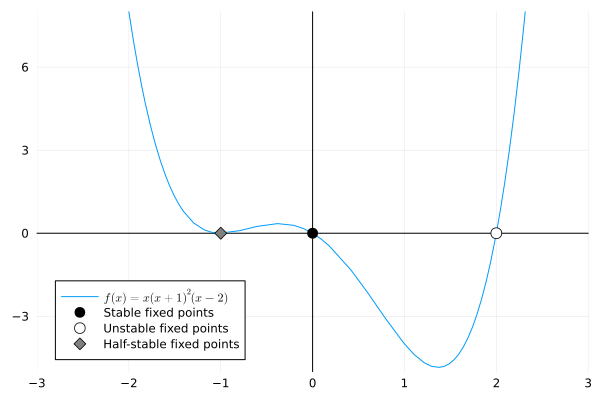

In [295]:
plt2 = plot(xlims=(-3, 3), ylims=(-5, 8), framestyle=:zerolines)

f2(x) = (x+1)^2 * x * (x-2)
plot!(f2, label=L"$f(x) = x (x+1)^2 (x-2)$")
PlotStable(plt2, [0])
PlotUnstable(plt2, [2])
PlotHalfStable(plt2, [-1])

In [121]:
savefig(plt2, "2.1.png")

"/home/vortriz/dev/IDC402/2.1.png"

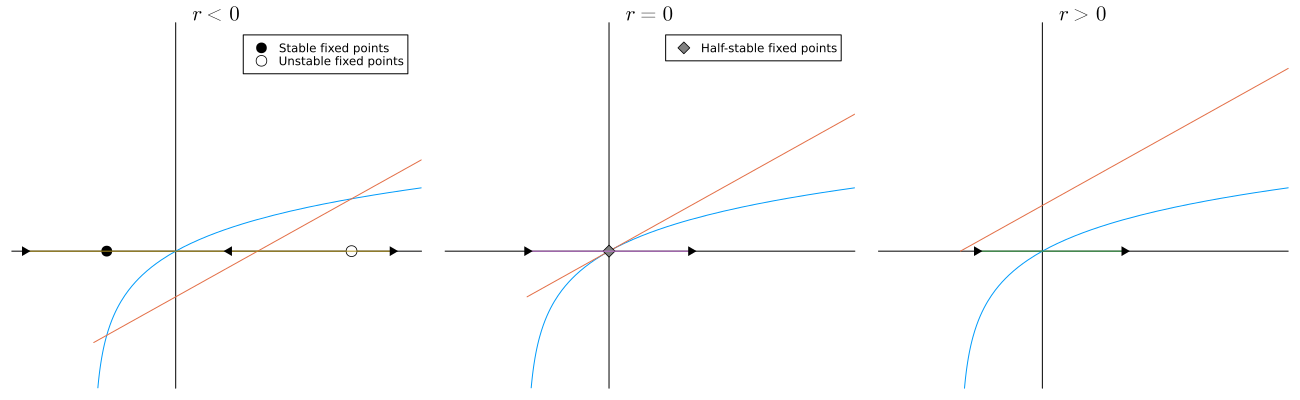

In [296]:
f3(r, x) = r + x - log(1 + x)

plt31 = plot([x -> log(1+x), x -> -1 + x], label="", title=L"$r < 0$")
fp31 = find_zeros(x -> f3(-1, x), -0.9, 3)
PlotStable(plt31, [fp31[1]])
PlotUnstable(plt31, [fp31[2]])
PlotFlow(plt31, [fp31[1]-1, (fp31[1]+fp31[2])/2, fp31[2]+0.5], ["r", "l", "r"])

plt32 = plot([x -> log(1+x), x -> x], label="", title=L"$r = 0$")
fp32 = find_zeros(x -> f3(0, x), -0.9, 3)
PlotHalfStable(plt32, [fp32[1]])
PlotFlow(plt32, [fp32[1]-1, fp32[1]+1], ["r", "r"])

plt33 = plot([x -> log(1+x), x -> 1 + x], label="", title=L"$r > 0$")
PlotFlow(plt33, [-0.8, 1], ["r", "r"])

plt3 = plot(plt31, plt32, plt33, xlims=(-2, 3), ylims=(-3, 5), framestyle=:zerolines, layout=(1, 3), size=(1300, 400), ticks=false)

In [220]:
savefig(plt3, "3")

"/home/vortriz/dev/IDC402/3.png"

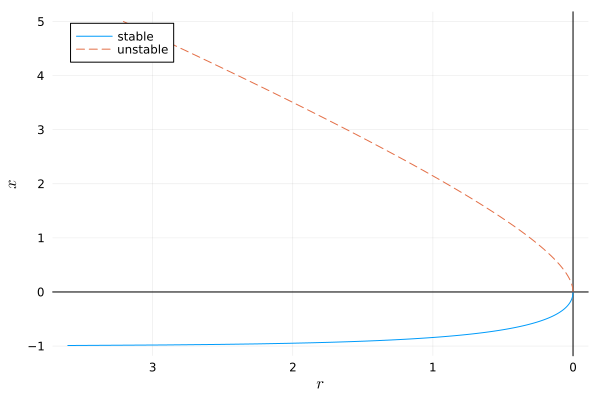

In [326]:
bif31 = range(-1, 0, length=100)
bif32 = range(0, 5, length=100)
plt3′ = plot([bif31, bif32], [f3.(0, bif31), f3.(0, bif32)], linestyle=[:solid :dash],
    yflip=true, permute=[:x, :y], framestyle=:zerolines, label=["stable" "unstable"], xlabel=L"$x$", ylabel=L"$r$")

In [327]:
savefig(plt3′, "3.1.png")

"/home/vortriz/dev/IDC402/3.1.png"